In [1]:
import kagglehub
import shutil

# 使用 kagglehub 下載數據集
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

# 自定義存放目錄
custom_path = "../data"
# Download latest version
path = kagglehub.dataset_download("ztamnaja/chestxdet10dataset")

print("Path to dataset files:", path)
# 移動數據集到自定義目錄
shutil.move(path[:-2], custom_path)

print(f"Dataset downloaded and moved to: {custom_path}")

c:\Users\Nico\anaconda3\envs\dev310-mldl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [10]:
import os
import pandas as pd
import numpy as np
def filePathsGen(rootPath):
    """此函數將rootPath資料夾目錄中的所有圖片路徑資訊儲存至一個清單內。"""
    paths = []
    # dirs = []
    for dirPath, dirNames, fileNames in os.walk(rootPath):
        for fileName in fileNames:
            # print(fileName)
            # category = dirPath.split("\\")[-1]  # (Windows)
            fullPath = os.path.join(dirPath, fileName)
            paths.append((fileName, fullPath))
    return paths

In [11]:
train_paths = filePathsGen("..\\data\\versions\\1\\train_data\\train-old")  # 載入圖片路徑 (Windows)
test_paths = filePathsGen("..\\data\\versions\\1\\test_data\\test_data")  # 載入圖片路徑 (Windows)
df_train_image = pd.DataFrame(train_paths, columns=["image","path"]) # 圖片路徑存成Pandas資料表
df_test_image = pd.DataFrame(test_paths, columns=["image","path"]) # 圖片路徑存成Pandas資料表

In [12]:
df_train_image

,image,path
0,36200.png,..\data\versions\1\train_data\train-old\36200.png
1,36201.png,..\data\versions\1\train_data\train-old\36201.png
2,36202.png,..\data\versions\1\train_data\train-old\36202.png
3,36203.png,..\data\versions\1\train_data\train-old\36203.png
4,36204.png,..\data\versions\1\train_data\train-old\36204.png
...,...,...
2996,70948.png,..\data\versions\1\train_data\train-old\70948.png
2997,70949.png,..\data\versions\1\train_data\train-old\70949.png
2998,70950.png,..\data\versions\1\train_data\train-old\70950.png
2999,70954.png,..\data\versions\1\train_data\train-old\70954.png


In [13]:
df_train_info = pd.read_json("..\\data\\versions\\1\\train.json")
df_test_info = pd.read_json("..\\data\\versions\\1\\test.json")
df_train = pd.merge(df_train_image, df_train_info, left_on='image', right_on='file_name', how='inner').drop(columns=['file_name'])
df_test = pd.merge(df_test_image, df_test_info, left_on='image', right_on='file_name', how='inner').drop(columns=['file_name'])


In [14]:
df_train

,image,path,syms,boxes
0,36200.png,..\data\versions\1\train_data\train-old\36200.png,[],[]
1,36201.png,..\data\versions\1\train_data\train-old\36201.png,[],[]
2,36202.png,..\data\versions\1\train_data\train-old\36202.png,[],[]
3,36203.png,..\data\versions\1\train_data\train-old\36203.png,[],[]
4,36204.png,..\data\versions\1\train_data\train-old\36204.png,[Nodule],"[[233, 666, 258, 693]]"
...,...,...,...,...
2996,70948.png,..\data\versions\1\train_data\train-old\70948.png,"[Consolidation, Effusion, Consolidation, Effus...","[[521, 441, 829, 945], [521, 441, 829, 945], [..."
2997,70949.png,..\data\versions\1\train_data\train-old\70949.png,"[Consolidation, Effusion, Consolidation, Effus...","[[559, 396, 847, 880], [559, 396, 847, 880], [..."
2998,70950.png,..\data\versions\1\train_data\train-old\70950.png,"[Consolidation, Calcification, Effusion]","[[637, 510, 824, 672], [748, 682, 771, 722], [..."
2999,70954.png,..\data\versions\1\train_data\train-old\70954.png,"[Consolidation, Consolidation]","[[603, 111, 858, 695], [254, 162, 479, 682]]"


In [15]:
df_train['diseased'] = df_train['syms'].apply(lambda x: 1 if len(x) > 0 else 0)

In [78]:
from sklearn.model_selection import train_test_split

# split dataset into train and val
train, val = train_test_split(
    df_train, 
    test_size=0.2,   # 設定 val 集比例
    stratify=df_train['diseased'],  # 按照 'label' 列分層
    random_state=25  # 固定隨機種子，確保可重現
)
pos_train = train['diseased'].value_counts()[1]
neg_train = train['diseased'].value_counts()[0]
# check class distribution
# print(f"Train Distribution:\n{train['diseased'].value_counts()}")
# print(f"Validation Distribution:\n{val['diseased'].value_counts()}")

In [79]:
neg_train

545

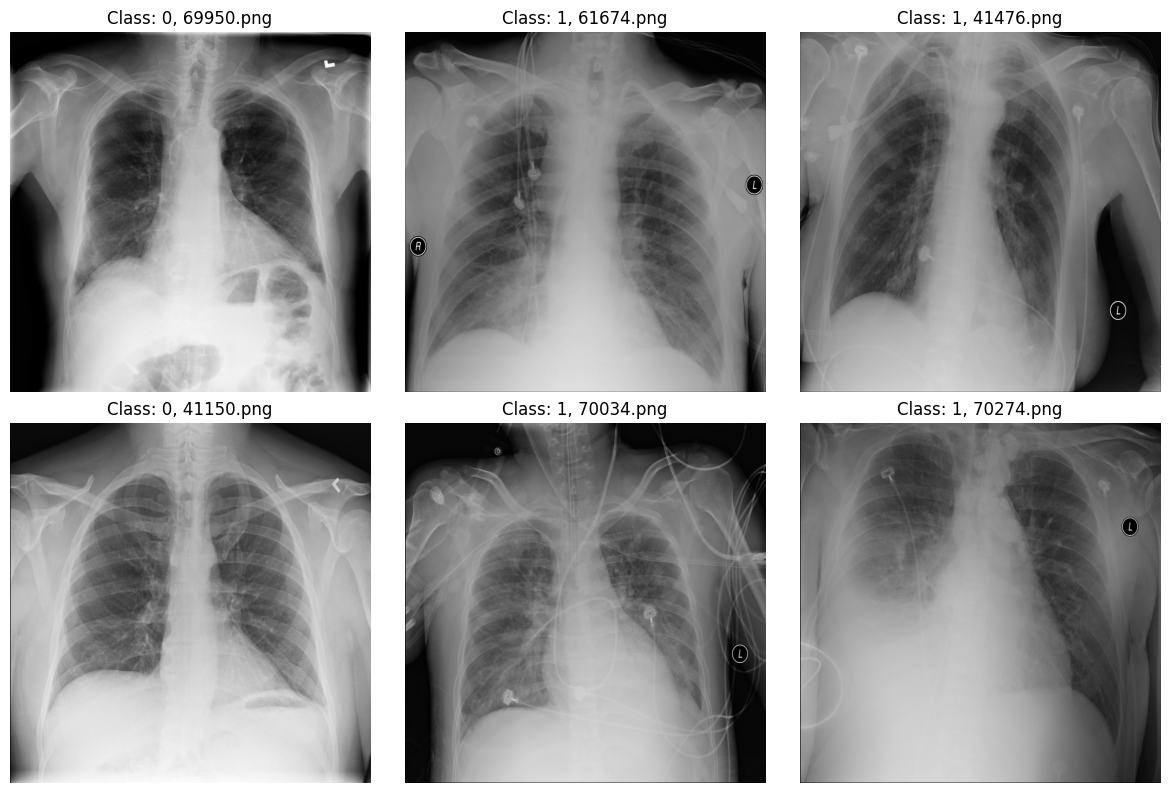

In [21]:
import matplotlib.pyplot as plt

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize for overall size

# Loop through the first 6 images
for j, ax in enumerate(axes.flat):  # Flatten the grid for easier iteration
    if j < len(train):  # Ensure we don't exceed the dataset size
        img = plt.imread(train["path"].iloc[j])  # Load the image
        title = train["diseased"].iloc[j]    # Get the corresponding class label
        image= train["image"].iloc[j]      
        ax.imshow(img, cmap="gray")             # Display the image
        ax.set_title(f"Class: {title}, {image}")         # Set the title for the subplot
        ax.axis("off")                          # Remove the axis for cleaner display

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


In [23]:

import cv2

def dataLoad(dfPath):
    # Extract file paths and initialize lists for images and labels
    paths = dfPath["path"].values
    images = []  # List to store processed images
    labels = []  # List to store corresponding labels

    for j in range(len(paths)):
        # Read the image
        img = cv2.imread(paths[j], cv2.IMREAD_GRAYSCALE) 
        # print(img.shape)
        # Convert to grayscale if the image is in RGB format
        # if len(img.shape) == 2:  # 如果是灰度圖像
        #     img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
        # Resize the image
        img_resized = cv2.resize(img, (128, 128))  # Use OpenCV for resizing
        
        # Normalize the image to the range [0, 1]
        img_resized = img_resized / 255.0
        images.append(img_resized)  # Add the processed image to the list

        # Convert the label to integer
        label = dfPath["diseased"].iloc[j]
        labels.append(label)

    # Convert the image and label lists to NumPy arrays
    x = np.array(images, dtype=np.float32)  # Array of processed images
    y = np.array(labels, dtype=np.int64)   # Array of integer labels

    return x, y

# Load training and validation data
trainX, trainY = dataLoad(train)
valX, valY = dataLoad(val)

print(f"Train data shape: {trainX.shape}, Train labels shape: {trainY.shape}")
print(f"Validation data shape: {valX.shape}, Validation labels shape: {valY.shape}")


Train data shape: (2400, 128, 128), Train labels shape: (2400,)
Validation data shape: (601, 128, 128), Validation labels shape: (601,)


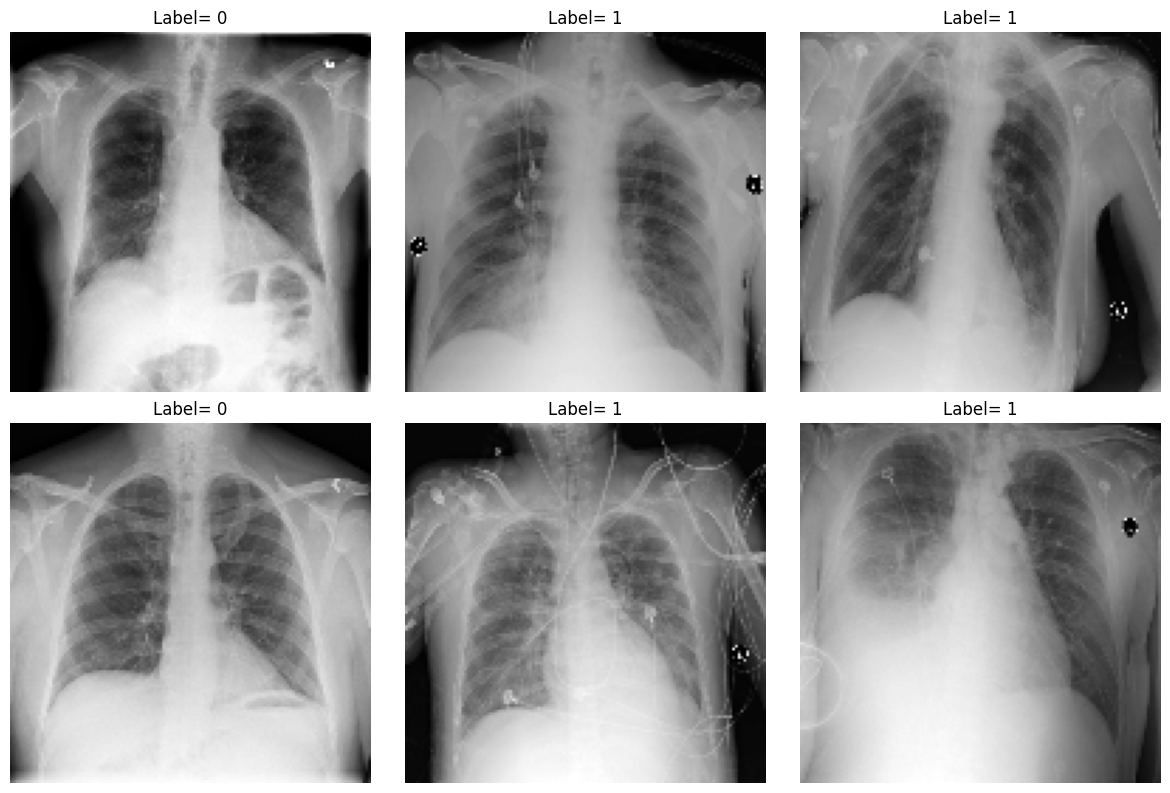

In [24]:


# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize to control the overall size

# Display the first 6 images
for i, ax in enumerate(axes.flat):  # Flatten the 2x3 grid into a 1D iterator
    ax.imshow(trainX[i, ...], cmap="gray")  # Show the image in grayscale
    ax.set_title(f"Label= {trainY[i]}")    # Set the title for each subplot
    ax.axis("off")  # Turn off axis for cleaner display

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
from torch.nn import Sequential
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import CrossEntropyLoss
import torch

In [26]:
# 轉換NumPy Tensor成為 PyTorch Tensor
x_train, y_train = torch.tensor(trainX), torch.tensor(trainY)
x_val, y_val = torch.tensor(valX), torch.tensor(valY)

# 確立資料型別
x_train = x_train.to(torch.float32).unsqueeze(1)
x_val = x_val.to(torch.float32).unsqueeze(1)
y_train = y_train.to(torch.int64)
y_val = y_val.to(torch.int64)

# 將PyTorch tensor 製作成 Data Loader
td = TensorDataset(x_train, y_train)
dl_train = DataLoader(td, batch_size=32, shuffle=True)

td = TensorDataset(x_val, y_val)
dl_test = DataLoader(td, batch_size=32, shuffle=False)

In [27]:
for x_batch, y_batch in dl_train:
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 1, 128, 128]) torch.Size([32])


In [ ]:

from torchmetrics.classification import BinaryAccuracy

class SimpleTrainer():
    def __init__(self, model, loss_fn, optimizer, device="cuda:0"):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = device
        self.accuracy_metric = BinaryAccuracy().to(device)  # 使用 torchmetrics 計算準確率
    
    def train_step(self, dataloader):
        self.model.train()
        train_loss, correct = 0, 0
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(self.device).float(), batch_y.to(self.device).float().unsqueeze(1)
            
            self.optimizer.zero_grad()  # 清空梯度
            pred_y = self.model(batch_x)  # 正向傳遞
            loss_value = self.loss_fn(pred_y, batch_y)  # 計算 loss
            # print(f"Model output (pred_y): {[f'{value:.5f}' for value in pred_y[:5].squeeze().tolist()]}")
            # print(f"Target (batch_y): {[f'{value:.5f}' for value in batch_y[:5].squeeze().tolist()]}")

            # print(f"Loss value: {loss_value.item()}")
            train_loss += loss_value.item()
            correct += self.accuracy_metric(pred_y, batch_y.int())  # 使用 BinaryAccuracy 計算準確率
            
                
            loss_value.backward()  # 反向傳播
            self.optimizer.step()  # 更新參數
            # print("after optimizer step:")
            # for name, param in self.model.named_parameters():
            #     # print(f"Parameter: {name}, Value: {param.data[0]}")
            #     if param.grad is not None:
            #         print(f"{name} gradient norm: {param.grad.norm()}")
            #     else:
            #         print(f"{name} gradient is None!")
            #     break
            
        train_loss /= len(dataloader.dataset)
        correct = correct / len(dataloader)  # 平均準確率
        print(f"train_loss={train_loss:.4f}, train_accuracy={correct:.6f}")
        return train_loss, correct.cpu().item()
    
    def test_step(self, dataloader):
        self.model.eval()
        test_loss, correct = 0, 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(self.device).float(), batch_y.to(self.device).float().unsqueeze(1)
                
                pred_y = self.model(batch_x)
                loss_value = self.loss_fn(pred_y, batch_y)
                test_loss += loss_value.item()
                correct += self.accuracy_metric(pred_y, batch_y.int())

        test_loss /= len(dataloader.dataset)
        correct = correct / len(dataloader)
        print(f"test_loss={test_loss:.4f}, test_accuracy={correct:.6f}")
        return test_loss, correct.cpu().item()
    
    def fit(self, dl_train, dl_test, num_epochs):
        self.metrics = {"train_acc": [], "test_acc": [], "train_loss": [], "test_loss": []}
        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1}/{num_epochs}")
            train_loss, train_acc = self.train_step(dl_train)
            test_loss, test_acc = self.test_step(dl_test)
            self.metrics["train_acc"].append(train_acc)
            self.metrics["test_acc"].append(test_acc)
            self.metrics["train_loss"].append(train_loss)
            self.metrics["test_loss"].append(test_loss)
        
    def graph_acc(self):
        import matplotlib.pyplot as plt
        plt.plot(self.metrics["train_acc"], label="train_acc")
        plt.plot(self.metrics["test_acc"], label="test_acc")
        plt.legend()
        plt.show()
        
    def graph_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.metrics["train_loss"], label="train_loss")
        plt.plot(self.metrics["test_loss"], label="test_loss")
        plt.legend()
        plt.show()

In [ ]:
from torch.nn import Linear, Conv2d, MaxPool2d, Flatten, Dropout, ReLU, BatchNorm2d, BatchNorm1d
class my_CNN:
    def __init__(self, image_shape, out_classes, in_channels=3):
        self.height, self.width = image_shape
        self.out_classes = out_classes
        self.in_channels = in_channels

    def build_CNN(self):
        CNN_layers = [
            Conv2d(self.in_channels, 32, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(32),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Conv2d(32, 64, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(64),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Conv2d(64, 128, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(128),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Flatten(),
            Linear((self.height // 8) * (self.width // 8 * 128), 512),
            ReLU(),
            BatchNorm1d(512),
            Dropout(p=0.5),

            Linear(512, self.out_classes),
            
        ]
        return Sequential(*CNN_layers)
     

In [ ]:
print(f"pos_train: {pos_train},neg_train: {neg_train}")
positive_weight = torch.tensor([neg_train / pos_train], dtype=torch.float).to("cuda:0")
print("pos_weight",positive_weight)

pos_train: 1855,neg_train: 545
pos_weight tensor([0.2938], device='cuda:0')


In [98]:
import torch.optim as optim
num_epochs = 50
learning_rate = 0.0001
CNN_model = my_CNN(image_shape=(128, 128), out_classes=1, in_channels=1).build_CNN()
ce_loss = CrossEntropyLoss()
# bce_loss = BCELoss()
bce_loss_log = nn.BCEWithLogitsLoss(pos_weight=positive_weight)
# CNN_opt = SGD(CNN_model.parameters(), lr=learning_rate)
# CNN_opt_Adam = Adam(CNN_model.parameters(), lr=learning_rate)
RMSprop_opt = optim.RMSprop(CNN_model.parameters(), lr=learning_rate)
model = SimpleTrainer(CNN_model, bce_loss_log, RMSprop_opt)
# (self, dl_train, dl_test, num_epochs)
metric = model.fit(dl_train, dl_test,num_epochs)

Epoch 1/50
train_loss=0.0103, train_accuracy=0.540833
test_loss=0.0250, test_accuracy=0.702368
Epoch 2/50
train_loss=0.0089, train_accuracy=0.600000
test_loss=0.0461, test_accuracy=0.529211
Epoch 3/50
train_loss=0.0088, train_accuracy=0.610000
test_loss=0.0382, test_accuracy=0.502697
Epoch 4/50
train_loss=0.0083, train_accuracy=0.637500
test_loss=0.0399, test_accuracy=0.549671
Epoch 5/50
train_loss=0.0081, train_accuracy=0.650000
test_loss=0.0420, test_accuracy=0.560461
Epoch 6/50
train_loss=0.0078, train_accuracy=0.672083
test_loss=0.0330, test_accuracy=0.622697
Epoch 7/50
train_loss=0.0077, train_accuracy=0.680833
test_loss=0.0330, test_accuracy=0.593092
Epoch 8/50
train_loss=0.0073, train_accuracy=0.700417
test_loss=0.0265, test_accuracy=0.606513
Epoch 9/50
train_loss=0.0070, train_accuracy=0.715417
test_loss=0.0379, test_accuracy=0.490000
Epoch 10/50
train_loss=0.0068, train_accuracy=0.722083
test_loss=0.0206, test_accuracy=0.608158
Epoch 11/50
train_loss=0.0064, train_accuracy=0.7

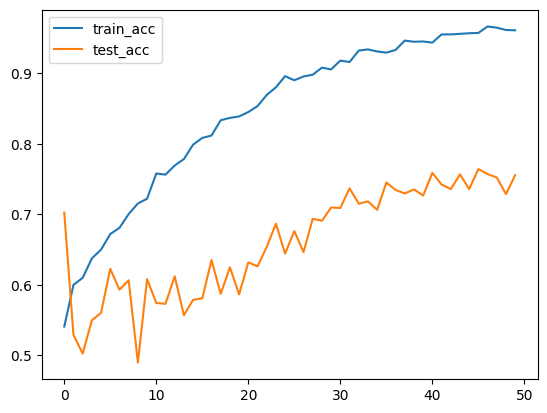

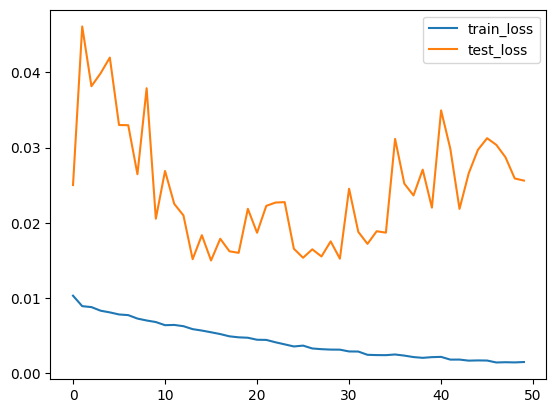

In [101]:
model.graph_acc()
model.graph_loss()